In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import mstats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.metrics import recall_score,accuracy_score, mean_squared_error, r2_score, log_loss, precision_score

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind

from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score, precision_score,roc_auc_score,f1_score,confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from pytorch_tabnet.tab_model import TabNetClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.ensemble import RUSBoostClassifier

## 0.파일 불러오기

In [3]:
df = pd.read_csv('../data/dataset/코스피_전처리완.csv')
df

,Symbol,Name,결산월,회계년,주기,분식기업,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),...,현금흐름/총자본(%),영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,DEPI,SGAI,LVGI,TATA,벤포드
0,A095570,AJ네트웍스,12,2015,Annual,0.0,100.00,7.03,2.75,183.57,...,89.25,1.43,1.03,1.00,0.81,0.18,1.01,0.96,0.10,0
1,A095570,AJ네트웍스,12,2016,Annual,0.0,100.00,4.93,1.36,132.12,...,80.01,2.19,1.13,1.00,1.28,0.17,1.02,1.03,0.12,0
2,A095570,AJ네트웍스,12,2017,Annual,0.0,100.00,2.66,2.45,47.92,...,83.63,1.66,1.96,1.00,8.47,0.14,1.02,1.02,0.07,0
3,A095570,AJ네트웍스,12,2018,Annual,0.0,100.00,-2.03,3.56,-45.35,...,68.01,1.87,0.53,1.00,0.44,0.05,1.05,1.00,0.02,0
4,A095570,AJ네트웍스,12,2019,Annual,0.0,100.00,1.56,4.21,33.42,...,52.35,-0.85,1.36,1.00,1.80,0.07,0.96,1.00,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,A003280,흥아해운,12,2018,Annual,0.0,5.36,-11.11,-85.84,-14.77,...,-59.50,-0.40,8.61,0.39,1.12,0.00,4.51,1.08,0.03,0
7019,A003280,흥아해운,12,2019,Annual,0.0,5.54,-12.10,-50.27,-17.19,...,-53.48,-0.10,0.07,0.97,0.90,0.00,1.07,1.02,-0.00,0
7020,A003280,흥아해운,12,2020,Annual,0.0,8.26,-6.52,-57.20,-10.13,...,-1586.70,-0.08,0.69,0.67,0.73,0.00,0.84,1.18,-0.01,0
7021,A003280,흥아해운,12,2021,Annual,0.0,6.94,-2.29,20.11,-2.10,...,73.87,-0.20,2.72,1.19,1.21,0.01,0.62,0.53,0.00,0


In [4]:
X = df[df.columns[6:]]
y = df['분식기업']

## 1.데이터 split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 42)

In [6]:
n, d = X_train.shape
print("number of feature:", d)  # 변수 개수
print("number of data:", n)     # 데이터 개수

number of feature: 40
number of data: 4916


In [7]:
X_train.describe()

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),ROE(세전계속사업이익)(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,현금흐름/총자본(%),영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,DEPI,SGAI,LVGI,TATA,벤포드
count,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.00000,4916.000000,4916.000000,4916.000000,...,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000,4916.000000
mean,22.034933,3.544138,1.702067,301.462667,104.943151,3.329184,314.71438,225.056932,18.775210,0.168910,...,8.600004,-0.944172,1.085161,1.074941,1.155167,0.037510,1.029087,1.018318,-0.010492,0.097030
std,20.453247,11.916821,36.035633,1359.432268,12.433844,47.948805,1614.55253,1716.880618,584.671105,2984.140321,...,37.323175,28.549077,1.676511,5.074056,1.424999,0.089438,0.470588,0.341328,0.062782,0.296029
min,-139.970000,-171.390000,-1148.680000,-2111.060000,36.850000,-2309.940000,-3145.61000,-3248.630000,-98.010000,-137079.350000,...,-1586.700000,-412.220000,0.000000,-150.020000,0.090000,0.000000,-22.520000,0.110000,-0.770000,0.000000
25%,10.230000,1.460000,0.200000,15.220000,101.487500,1.137500,6.11500,2.062500,-4.412500,-44.932500,...,5.060000,-1.780000,0.870000,0.900000,0.900000,0.000000,0.930000,0.930000,-0.040000,0.000000
50%,16.260000,4.120000,2.995000,82.940000,104.300000,6.900000,75.58500,52.900000,3.670000,-2.885000,...,10.550000,-0.860000,0.980000,1.000000,1.000000,0.010000,1.010000,0.990000,-0.010000,0.000000
75%,27.190000,7.490000,6.470000,252.600000,108.100000,13.012500,263.24500,186.040000,13.712500,37.650000,...,17.012500,-0.080000,1.100000,1.100000,1.130000,0.030000,1.090000,1.050000,0.020000,0.000000
max,100.000000,81.180000,1079.840000,50556.070000,531.400000,498.660000,49541.57000,100051.640000,40693.190000,116066.340000,...,228.330000,1256.760000,83.470000,185.240000,46.180000,0.980000,14.140000,10.180000,0.460000,1.000000


In [8]:
print(y_train.value_counts())
print(y_test.value_counts())

분식기업
0.0    4817
1.0      99
Name: count, dtype: int64
분식기업
0.0    2064
1.0      43
Name: count, dtype: int64


## 2. train set 리샘플링

In [9]:
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y):
    counter = Counter(y)
    for k, v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' %(k,v,v /len(y) *100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=0, n=4807 (49.948%)
Class=1, n=4817 (50.052%)


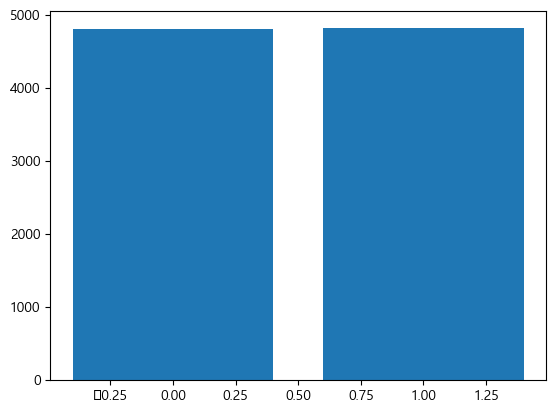

In [10]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_resampled_t, y_train_resampled_t = smoteto.fit_resample(X_train, y_train)
count_and_plot(y_train_resampled_t)

In [11]:
X_train_resampled_t

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),ROE(세전계속사업이익)(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,현금흐름/총자본(%),영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,DEPI,SGAI,LVGI,TATA,벤포드
0,20.880000,4.960000,1.180000,802.860000,105.210000,4.980000,336.400000,127.310000,7.870000,67.860000,...,11.050000,-1.280000,1.050000,0.920000,0.970000,0.010000,1.000000,1.000000,-0.010000,0
1,9.460000,-16.450000,-37.050000,-117.640000,85.880000,-22.420000,-160.930000,-260.950000,-1.470000,-541.680000,...,-35.020000,-0.680000,0.790000,1.930000,1.070000,0.020000,1.770000,1.130000,0.010000,0
2,4.960000,-8.570000,-10.000000,-610.380000,92.100000,-39.870000,-832.900000,-713.660000,38.430000,33.110000,...,-17.730000,0.180000,0.870000,0.630000,1.120000,0.010000,1.120000,1.090000,-0.070000,0
3,6.010000,1.480000,0.270000,211.050000,101.500000,0.760000,37.970000,73.340000,-1.430000,-60.010000,...,6.670000,-0.390000,1.080000,1.410000,0.900000,0.010000,0.940000,1.050000,0.010000,0
4,21.190000,6.990000,4.830000,168.290000,107.520000,18.550000,141.050000,116.280000,3.540000,25.720000,...,25.390000,-0.180000,2.120000,1.020000,1.190000,0.030000,0.900000,0.920000,0.070000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,32.091690,4.160583,3.171811,85.142434,104.347847,12.864064,87.264345,63.429537,6.262012,-2.900484,...,11.429517,0.873300,1.005211,0.992052,0.963280,0.377807,1.022193,1.005755,0.020000,0
9620,6.491216,2.834388,0.586626,90.383974,102.916582,4.839168,33.498988,25.164384,4.397490,-20.520162,...,7.199726,0.759153,0.928016,1.154178,1.093418,0.017806,1.025358,1.035612,0.070000,0
9621,16.429506,0.632588,-0.663120,13.766786,100.632701,-2.300709,-24.491464,-14.655188,2.953946,-72.797828,...,5.588940,0.343371,1.118987,1.155514,0.999887,0.020000,0.948987,1.108875,0.019212,0
9622,6.651875,2.843421,0.718317,87.608968,102.924227,5.776361,37.493917,31.353354,8.834827,-25.752901,...,8.683822,0.521879,0.860268,1.215437,1.101342,0.030469,1.009463,1.038389,0.068658,0


In [12]:
y_train_resampled_t.value_counts()

분식기업
1.0    4817
0.0    4807
Name: count, dtype: int64

## 3. 모델링

### 3.1 로지스틱 회귀 분석

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt

# 로지스틱 회귀 모델 생성과 학습
model = LogisticRegression(random_state = 42)
model.fit(X_train_resampled_t, y_train_resampled_t)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6454674893213099
Precision: 0.03562005277044855
Recall: 0.627906976744186
F1 Score: 0.06741573033707866


In [14]:
y_train_pred = model.predict(X_train_resampled_t)
accuracy = accuracy_score(y_train_resampled_t, y_train_pred)
precision = precision_score(y_train_resampled_t, y_train_pred)
recall = recall_score(y_train_resampled_t, y_train_pred)
f1 = f1_score(y_train_resampled_t, y_train_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6869285120532004
Precision: 0.6712224753227031
Recall: 0.7340668465850114
F1 Score: 0.7012394645513138


### 3.2 catboost

In [15]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CatBoost 모델 생성
model = CatBoostClassifier(iterations=100, learning_rate=0.1, loss_function='Logloss', random_state = 42)

# 모델 학습
model.fit(X_train_resampled_t, y_train_resampled_t, verbose=0)

# 테스트 데이터에 대한 예측
y_pred2 = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9629805410536307
Precision: 0.26666666666666666
Recall: 0.46511627906976744
F1 Score: 0.3389830508474576


### 3-3. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree 모델 생성
model = DecisionTreeClassifier(random_state = 42)

# 모델 학습
model.fit(X_train_resampled_t, y_train_resampled_t)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9250118652112007
Precision: 0.10884353741496598
Recall: 0.37209302325581395
F1 Score: 0.16842105263157894


### 3.4 나이브베이즈

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 기본 나이브 베이즈 분류기 생성
base_model = GaussianNB()

# 배깅 분류기 생성
model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# 모델 학습
model.fit(X_train_resampled_t, y_train_resampled_t)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.29093497864261986
Precision: 0.024262295081967214
Recall: 0.8604651162790697
F1 Score: 0.04719387755102041


## 4. 성능 저장

In [18]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

In [19]:
logit = LogisticRegression(random_state = 42)
logit.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = logit.predict(X_train_resampled_t)
y_pred_test = logit.predict(X_test)

log_train = [accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
log_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['logit_train'] = log_train
test_df['logit_test'] = log_test

print(confusion_matrix(y_test,y_pred_test))

[[1333  731]
 [  16   27]]


In [20]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = rf.predict(X_train_resampled_t)
y_pred_test = rf.predict(X_test)

rf_train = [accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
rf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['rf_train'] = rf_train
test_df['rf_test'] = rf_test


print(confusion_matrix(y_test,y_pred_test))

[[2052   12]
 [  28   15]]


In [21]:
ad_clf = AdaBoostClassifier(random_state = 42)
ad_clf.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = ad_clf.predict(X_train_resampled_t)
y_pred_test = ad_clf.predict(X_test)

ad_train = [accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
ad_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['ad_train'] = ad_train
test_df['ad_test'] = ad_test

print(confusion_matrix(y_test,y_pred_test))

[[1717  347]
 [  20   23]]


In [22]:
gb_clf = GradientBoostingClassifier(random_state = 42)
gb_clf.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = gb_clf.predict(X_train_resampled_t)
y_pred_test = gb_clf.predict(X_test)

gb_train= [accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
gb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['gb_train'] = gb_train
test_df['gb_test'] = gb_test

print(confusion_matrix(y_test,y_pred_test))

[[1901  163]
 [  18   25]]


In [23]:
rus_clf = RUSBoostClassifier(random_state = 42)
rus_clf.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = rus_clf.predict(X_train_resampled_t)
y_pred_test = rus_clf.predict(X_test)

rus_train= [accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
rus_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['rus_train'] = rus_train
test_df['rus_test'] = rus_test

print(confusion_matrix(y_test,y_pred_test))

[[1732  332]
 [  19   24]]


In [24]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = xgb.predict(X_train_resampled_t)
y_pred_test = xgb.predict(X_test)

xgb_train = [accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
xgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['xgb_train'] = xgb_train
test_df['xgb_test'] = xgb_test


print(confusion_matrix(y_test,y_pred_test))

[[2048   16]
 [  22   21]]


In [25]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = lgb.predict(X_train_resampled_t)
y_pred_test = lgb.predict(X_test)

lgb_train =[accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
lgb_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['lgb_train'] = lgb_train
test_df['lgb_test'] = lgb_test


print(confusion_matrix(y_test,y_pred_test))

[LightGBM] [Info] Number of positive: 4817, number of negative: 4807
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9947
[LightGBM] [Info] Number of data points in the train set: 9624, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500520 -> initscore=0.002078
[LightGBM] [Info] Start training from score 0.002078
[[2044   20]
 [  19   24]]


In [26]:
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(X_train_resampled_t, y_train_resampled_t)
y_pred_train = cat.predict(X_train_resampled_t)
y_pred_test = cat.predict(X_test)

cat_train = [accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
cat_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['cat_train'] = cat_train
test_df['cat_test'] = cat_test


print(confusion_matrix(y_test,y_pred_test))

[[2052   12]
 [  27   16]]


In [33]:
svc_clf = SVC(random_state = 42) 
svc_clf.fit(X_train_resampled_t,y_train_resampled_t)
y_pred_train = svc_clf.predict(X_train_resampled_t)
y_pred_test = svc_clf.predict(X_test)

svc_clf_train =[accuracy_score(y_train_resampled_t, y_pred_train),precision_score(y_train_resampled_t, y_pred_train),recall_score(y_train_resampled_t, y_pred_train),f1_score(y_train_resampled_t, y_pred_train),roc_auc_score(y_train_resampled_t, y_pred_train)]
svc_clf_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

train_df['svm_train'] = svc_clf_train
test_df['svm_test'] = svc_clf_test


print(confusion_matrix(y_test,y_pred_test))

[[ 327 1737]
 [   2   41]]


In [28]:
# clf = TabNetClassifier()

# # 모델 훈련
# clf.fit(
#     X_train.values, y_train.values,
#     eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
#     eval_name=['train', 'test'],
#     eval_metric=['accuracy'],
#     max_epochs=10,
#     patience=10,
#     batch_size=1024, 
#     virtual_batch_size=128,
#     num_workers=0,
#     drop_last=False
# )

In [29]:
# y_pred_train = clf.predict(X_train.values)
# y_pred_test = clf.predict(X_test.values)

# tab_train = [accuracy_score(y_train, y_pred_train),precision_score(y_train, y_pred_train),recall_score(y_train, y_pred_train),f1_score(y_train, y_pred_train),roc_auc_score(y_train, y_pred_train)]
# tab_test = [accuracy_score(y_test, y_pred_test),precision_score(y_test, y_pred_test),recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test),roc_auc_score(y_test, y_pred_test)]

# df['tabnet_train'] = tab_train
# df['tabnet_test'] = tab_test


# print(confusion_matrix(y_test,y_pred_test))

In [30]:
# import torch
# import pytorch_tabnet

# print("PyTorch Version:", torch.__version__)
# print("pytorch_tabnet Version:", pytorch_tabnet.__version__)


In [34]:
train_df.index = ['accuracy','precision','recall','f1-score','roc-auc']
test_df.index = ['accuracy','precision','recall','f1-score','roc-auc']
train_df

,logit_train,rf_train,ad_train,gb_train,rus_train,xgb_train,lgb_train,cat_train,svm_train
accuracy,0.686929,1.0,0.898587,0.966750,0.900561,1.0,1.0,1.0,0.561409
precision,0.671222,1.0,0.871974,0.946929,0.875049,1.0,1.0,1.0,0.534348
recall,0.734067,1.0,0.934607,0.988997,0.934814,1.0,1.0,1.0,0.962425
f1-score,0.701239,1.0,0.902204,0.967506,0.903945,1.0,1.0,1.0,0.687171
roc-auc,0.686879,1.0,0.898549,0.966727,0.900525,1.0,1.0,1.0,0.560992


In [35]:
test_df

,logit_test,rf_test,ad_test,gb_test,rus_test,xgb_test,lgb_test,cat_test,svm_test
accuracy,0.645467,0.981016,0.825819,0.914096,0.833412,0.981965,0.981490,0.981490,0.174656
precision,0.035620,0.555556,0.062162,0.132979,0.067416,0.567568,0.545455,0.571429,0.023060
recall,0.627907,0.348837,0.534884,0.581395,0.558140,0.488372,0.558140,0.372093,0.953488
f1-score,0.067416,0.428571,0.111380,0.216450,0.120301,0.525000,0.551724,0.450704,0.045030
roc-auc,0.636870,0.671512,0.683382,0.751211,0.698643,0.740310,0.774225,0.683140,0.555959
